# ASSAM

In [68]:
import pandas as pd

# Load the datasets for Assam
df_as_enrolment = pd.read_csv('/content/Assam Enrolment Dataset.csv')
df_as_demographic = pd.read_csv('/content/Assam Demographic Dataset.csv')
df_as_biometric = pd.read_csv('/content/Assam Biometric Dataset.csv')

print("Assam Enrolment Dataset:")
print(df_as_enrolment.head())
print(df_as_enrolment.info())
print(df_as_enrolment.describe())

print("\nAssam Demographic Dataset:")
print(df_as_demographic.head())
print(df_as_demographic.info())
print(df_as_demographic.describe())

print("\nAssam Biometric Dataset:")
print(df_as_biometric.head())
print(df_as_biometric.info())
print(df_as_biometric.describe())

Assam Enrolment Dataset:
         date  state district  pincode  age_0_5  age_5_17  age_18_greater
0  01-09-2025  Assam   Bajali   781375        1         0               0
1  01-09-2025  Assam    Baksa   781315        6         1               0
2  01-09-2025  Assam    Baksa   781340        1         0               0
3  01-09-2025  Assam    Baksa   781360        3         1               0
4  01-09-2025  Assam  Barpeta   781316       22         1               1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37211 entries, 0 to 37210
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            37211 non-null  object
 1   state           37211 non-null  object
 2   district        37211 non-null  object
 3   pincode         37211 non-null  int64 
 4   age_0_5         37211 non-null  int64 
 5   age_5_17        37211 non-null  int64 
 6   age_18_greater  37211 non-null  int64 
dtypes: int64(4), object(3)

In [69]:
df_as_enrolment['date'] = pd.to_datetime(df_as_enrolment['date'], format='%d-%m-%Y')
df_as_demographic['date'] = pd.to_datetime(df_as_demographic['date'], format='%d-%m-%Y')
df_as_biometric['date'] = pd.to_datetime(df_as_biometric['date'], format='%d-%m-%Y')

print("Data types after conversion for df_as_enrolment:")
print(df_as_enrolment.info())
print("\nData types after conversion for df_as_demographic:")
print(df_as_demographic.info())
print("\nData types after conversion for df_as_biometric:")
print(df_as_biometric.info())

Data types after conversion for df_as_enrolment:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37211 entries, 0 to 37210
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            37211 non-null  datetime64[ns]
 1   state           37211 non-null  object        
 2   district        37211 non-null  object        
 3   pincode         37211 non-null  int64         
 4   age_0_5         37211 non-null  int64         
 5   age_5_17        37211 non-null  int64         
 6   age_18_greater  37211 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 2.0+ MB
None

Data types after conversion for df_as_demographic:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67697 entries, 0 to 67696
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           67697 non-null  dat

In [70]:
merged_as_df_temp = pd.merge(df_as_enrolment, df_as_demographic, on=['date', 'state', 'district', 'pincode'], how='outer')
df_as_merged = pd.merge(merged_as_df_temp, df_as_biometric, on=['date', 'state', 'district', 'pincode'], how='outer')

# Identify numeric columns
numeric_cols = df_as_merged.select_dtypes(include=['number']).columns

# Replace NaN values in numeric columns with 0
df_as_merged[numeric_cols] = df_as_merged[numeric_cols].fillna(0)

print("Merged Assam DataFrame (df_as_merged) head:")
print(df_as_merged.head())
print("\nMerged Assam DataFrame (df_as_merged) info:")
print(df_as_merged.info())

Merged Assam DataFrame (df_as_merged) head:
        date  state district  pincode  age_0_5  age_5_17  age_18_greater  \
0 2025-03-01  Assam    Baksa   781315      0.0       0.0             0.0   
1 2025-03-01  Assam    Baksa   781315      0.0       0.0             0.0   
2 2025-03-01  Assam    Baksa   781315      0.0       0.0             0.0   
3 2025-03-01  Assam    Baksa   781315      0.0       0.0             0.0   
4 2025-03-01  Assam    Baksa   781327      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  
0           49.0         483.0         183.0         84.0  
1           49.0         483.0         183.0         84.0  
2           49.0         483.0         183.0         84.0  
3           49.0         483.0         183.0         84.0  
4           13.0         342.0         181.0         32.0  

Merged Assam DataFrame (df_as_merged) info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198210 entries, 0 to 198209
Data columns (to

In [71]:
df_as = df_as_merged[df_as_merged['state'] == 'Assam'].copy()
df_as['year'] = df_as['date'].dt.year
df_as['month'] = df_as['date'].dt.month

print("Shape of df_as:", df_as.shape)
print("\nFirst 5 rows of df_as with new 'year' and 'month' columns:")
print(df_as.head())

Shape of df_as: (198210, 13)

First 5 rows of df_as with new 'year' and 'month' columns:
        date  state district  pincode  age_0_5  age_5_17  age_18_greater  \
0 2025-03-01  Assam    Baksa   781315      0.0       0.0             0.0   
1 2025-03-01  Assam    Baksa   781315      0.0       0.0             0.0   
2 2025-03-01  Assam    Baksa   781315      0.0       0.0             0.0   
3 2025-03-01  Assam    Baksa   781315      0.0       0.0             0.0   
4 2025-03-01  Assam    Baksa   781327      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  year  month  
0           49.0         483.0         183.0         84.0  2025      3  
1           49.0         483.0         183.0         84.0  2025      3  
2           49.0         483.0         183.0         84.0  2025      3  
3           49.0         483.0         183.0         84.0  2025      3  
4           13.0         342.0         181.0         32.0  2025      3  


In [72]:
age_columns = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

df_as_agg = df_as.groupby(['year', 'month', 'state', 'district'])[age_columns].sum().reset_index()

print("Aggregated DataFrame (df_as_agg) head:")
print(df_as_agg.head())
print("\nAggregated DataFrame (df_as_agg) info:")
print(df_as_agg.info())

Aggregated DataFrame (df_as_agg) head:
   year  month  state    district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Assam       Baksa     11.0      14.0            13.0   
1  2025      3  Assam     Barpeta     24.0      34.0            10.0   
2  2025      3  Assam   Biswanath      0.0       0.0             0.0   
3  2025      3  Assam  Bongaigaon     25.0      33.0            31.0   
4  2025      3  Assam      Cachar      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  
0          438.0        4569.0        1710.0        800.0  
1         1286.0       14992.0       16443.0       3444.0  
2          240.0        2866.0         777.0        474.0  
3          312.0        3955.0        2432.0       1055.0  
4         1205.0       10582.0        2803.0       3271.0  

Aggregated DataFrame (df_as_agg) info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 11 columns):
 #   Column          No

In [73]:
import numpy as np

# 1. Create 'totalenrolments' column
df_as_agg['totalenrolments'] = df_as_agg['age_0_5'] + df_as_agg['age_5_17'] + df_as_agg['age_18_greater']

# 2. Create 'childenrolments' column
df_as_agg['childenrolments'] = df_as_agg['age_0_5'] + df_as_agg['age_5_17']

# 3. Create 'totaldemoupdates' column
df_as_agg['totaldemoupdates'] = df_as_agg['demo_age_5_17'] + df_as_agg['demo_age_17_']

# 4. Create 'totalbioupdates' column
df_as_agg['totalbioupdates'] = df_as_agg['bio_age_5_17'] + df_as_agg['bio_age_17_']

# 5. Calculate 'CES' (Child Enrolment Score) with division by zero handling
df_as_agg['CES'] = np.where(
    df_as_agg['totalenrolments'] == 0,
    0,
    df_as_agg['childenrolments'] / df_as_agg['totalenrolments']
)

# 6. Calculate 'DUR' (Demographic Update Rate) with division by zero handling
df_as_agg['DUR'] = np.where(
    df_as_agg['totalenrolments'] == 0,
    0,
    df_as_agg['totaldemoupdates'] / df_as_agg['totalenrolments']
)

# 7. Calculate 'BUR' (Biometric Update Rate) with division by zero handling
df_as_agg['BUR'] = np.where(
    df_as_agg['totalenrolments'] == 0,
    0,
    df_as_agg['totalbioupdates'] / df_as_agg['totalenrolments']
)

# 8. Display the head of the DataFrame
print("Aggregated DataFrame (df_as_agg) with new metrics head:")
print(df_as_agg.head())

Aggregated DataFrame (df_as_agg) with new metrics head:
   year  month  state    district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Assam       Baksa     11.0      14.0            13.0   
1  2025      3  Assam     Barpeta     24.0      34.0            10.0   
2  2025      3  Assam   Biswanath      0.0       0.0             0.0   
3  2025      3  Assam  Bongaigaon     25.0      33.0            31.0   
4  2025      3  Assam      Cachar      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  totalenrolments  \
0          438.0        4569.0        1710.0        800.0             38.0   
1         1286.0       14992.0       16443.0       3444.0             68.0   
2          240.0        2866.0         777.0        474.0              0.0   
3          312.0        3955.0        2432.0       1055.0             89.0   
4         1205.0       10582.0        2803.0       3271.0              0.0   

   childenrolments  totaldemoupdates  tota

In [74]:
def min_max_normalize(series):
    min_val = series.min()
    max_val = series.max()
    if max_val == min_val:
        return 0  # Handle division by zero case
    return (series - min_val) / (max_val - min_val)

# Apply min-max normalization to 'totalenrolments', grouped by 'year' and 'state'
df_as_agg['Enorm'] = df_as_agg.groupby(['year', 'state'])['totalenrolments'].transform(min_max_normalize)

# Apply min-max normalization to 'totaldemoupdates', grouped by 'year' and 'state'
df_as_agg['Dnorm'] = df_as_agg.groupby(['year', 'state'])['totaldemoupdates'].transform(min_max_normalize)

# Apply min-max normalization to 'totalbioupdates', grouped by 'year', 'month' and 'state'
df_as_agg['Bnorm'] = df_as_agg.groupby(['year', 'state'])['totalbioupdates'].transform(min_max_normalize)

# Calculate 'stdnorm' by combining the normalized metrics
df_as_agg['stdnorm'] = (df_as_agg['Enorm'] + df_as_agg['Dnorm'] + df_as_agg['Bnorm']) / 3

# Compute 'ALBI' (Aadhaar Lifecycle Balance Index) as 1 - stdnorm
df_as_agg['ALBI'] = 1 - df_as_agg['stdnorm']

# Clip the values in the 'ALBI' column to ensure they are between 0 and 1
df_as_agg['ALBI'] = df_as_agg['ALBI'].clip(lower=0, upper=1)

# Display the head of the DataFrame to show the newly created columns
print("Aggregated DataFrame (df_as_agg) with normalized metrics and ALBI head:")
print(df_as_agg.head())

Aggregated DataFrame (df_as_agg) with normalized metrics and ALBI head:
   year  month  state    district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Assam       Baksa     11.0      14.0            13.0   
1  2025      3  Assam     Barpeta     24.0      34.0            10.0   
2  2025      3  Assam   Biswanath      0.0       0.0             0.0   
3  2025      3  Assam  Bongaigaon     25.0      33.0            31.0   
4  2025      3  Assam      Cachar      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...  totaldemoupdates  \
0          438.0        4569.0        1710.0  ...            5007.0   
1         1286.0       14992.0       16443.0  ...           16278.0   
2          240.0        2866.0         777.0  ...            3106.0   
3          312.0        3955.0        2432.0  ...            4267.0   
4         1205.0       10582.0        2803.0  ...           11787.0   

   totalbioupdates       CES         DUR         BUR     Enorm     D

In [75]:
df_as_agg['Enormrisk'] = 1 - df_as_agg['Enorm']
df_as_agg['CESrisknorm'] = 1 - df_as_agg['CES']
df_as_agg['DURrisknorm'] = 1 - df_as_agg['DUR']
df_as_agg['BURrisknorm'] = 1 - df_as_agg['BUR']
df_as_agg['ALBIrisknorm'] = 1 - df_as_agg['ALBI']

# Calculate the 'riskscore' by summing the risk components, averaging, and scaling to 0-100
df_as_agg['riskscore'] = (
    df_as_agg['Enormrisk'] +
    df_as_agg['CESrisknorm'] +
    df_as_agg['DURrisknorm'] +
    df_as_agg['BURrisknorm'] +
    df_as_agg['ALBIrisknorm']
) / 5 * 100

# Display the head of the DataFrame to show the newly created risk-related columns
print("Aggregated DataFrame (df_as_agg) with risk components and riskscore head:")
print(df_as_agg.head())

Aggregated DataFrame (df_as_agg) with risk components and riskscore head:
   year  month  state    district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Assam       Baksa     11.0      14.0            13.0   
1  2025      3  Assam     Barpeta     24.0      34.0            10.0   
2  2025      3  Assam   Biswanath      0.0       0.0             0.0   
3  2025      3  Assam  Bongaigaon     25.0      33.0            31.0   
4  2025      3  Assam      Cachar      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...     Dnorm     Bnorm  \
0          438.0        4569.0        1710.0  ...  0.148075  0.061589   
1         1286.0       14992.0       16443.0  ...  0.481398  0.487977   
2          240.0        2866.0         777.0  ...  0.091855  0.030696   
3          312.0        3955.0        2432.0  ...  0.126190  0.085562   
4         1205.0       10582.0        2803.0  ...  0.348583  0.149041   

    stdnorm      ALBI  Enormrisk  CESrisknorm  DURrisk

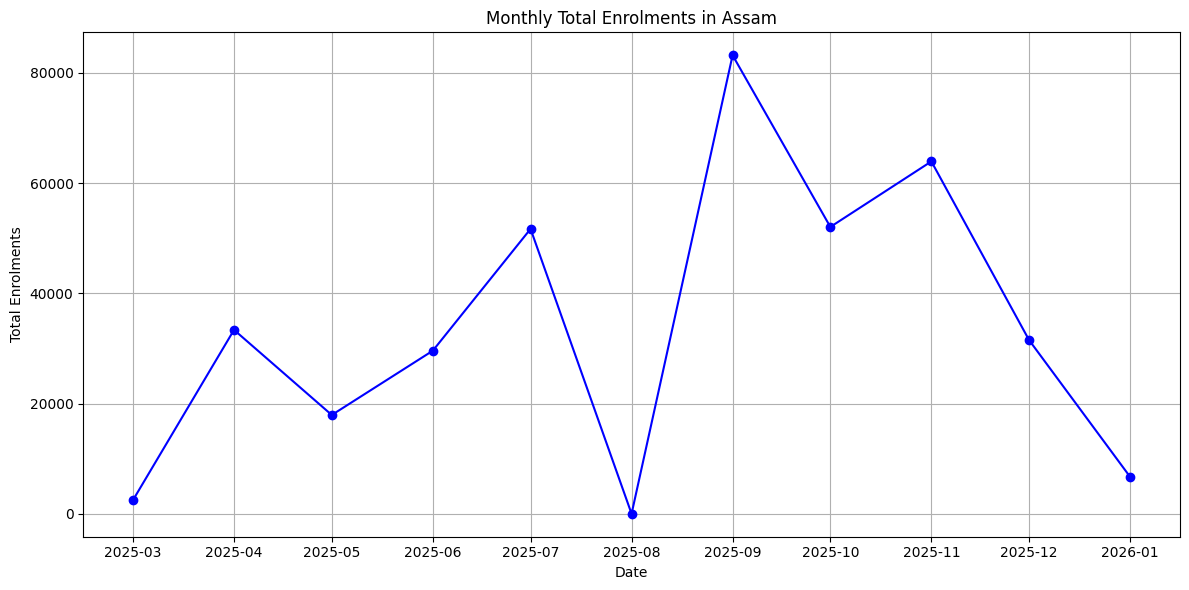

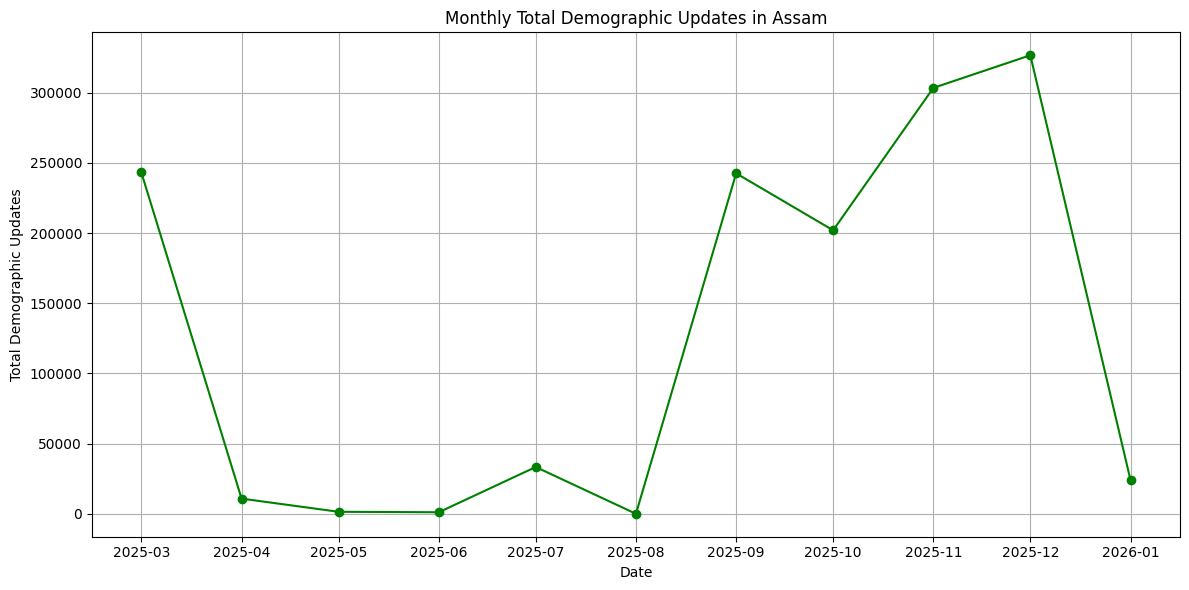

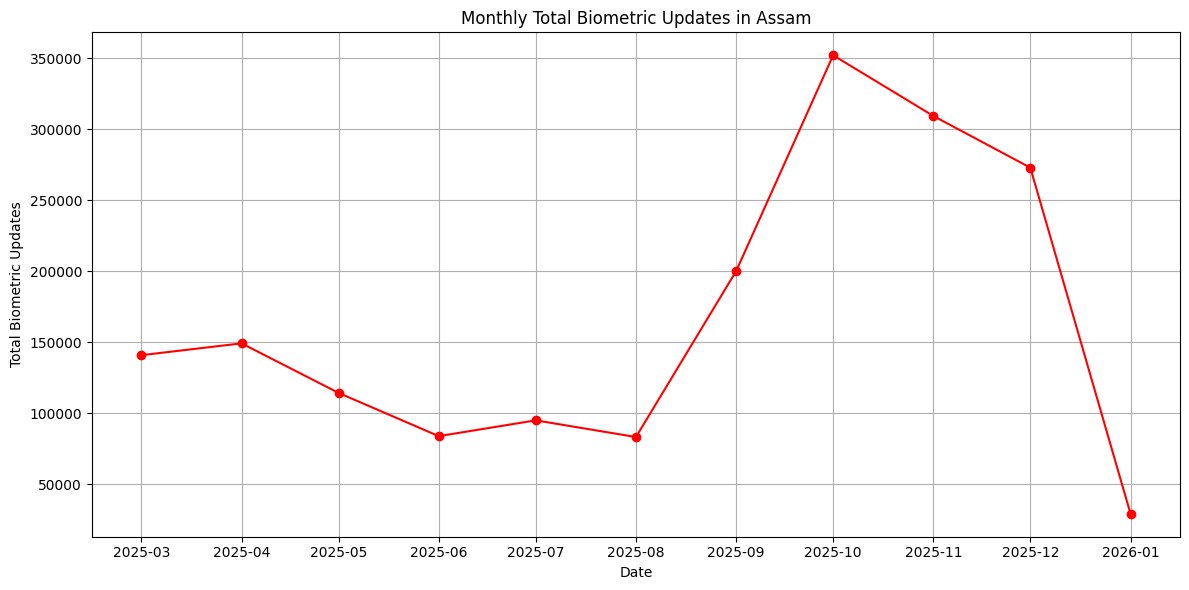

Monthly trend plots generated successfully.


In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

df_as_monthly_trends = df_as_agg.groupby(['year', 'month']).agg({
    'totalenrolments': 'sum',
    'totaldemoupdates': 'sum',
    'totalbioupdates': 'sum'
}).reset_index()

# Create a date column for plotting
df_as_monthly_trends['date'] = pd.to_datetime(df_as_monthly_trends['year'].astype(str) + '-' + df_as_monthly_trends['month'].astype(str) + '-01')

# Sort by date to ensure proper trend plotting
df_as_monthly_trends = df_as_monthly_trends.sort_values(by='date')

# Plotting totalenrolments monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_as_monthly_trends['date'], df_as_monthly_trends['totalenrolments'], marker='o', linestyle='-', color='blue')
plt.xlabel('Date')
plt.ylabel('Total Enrolments')
plt.title('Monthly Total Enrolments in Assam')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totaldemoupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_as_monthly_trends['date'], df_as_monthly_trends['totaldemoupdates'], marker='o', linestyle='-', color='green')
plt.xlabel('Date')
plt.ylabel('Total Demographic Updates')
plt.title('Monthly Total Demographic Updates in Assam')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totalbioupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_as_monthly_trends['date'], df_as_monthly_trends['totalbioupdates'], marker='o', linestyle='-', color='red')
plt.xlabel('Date')
plt.ylabel('Total Biometric Updates')
plt.title('Monthly Total Biometric Updates in Assam')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Monthly trend plots generated successfully.")

### UNIVARIATE ANALYSIS

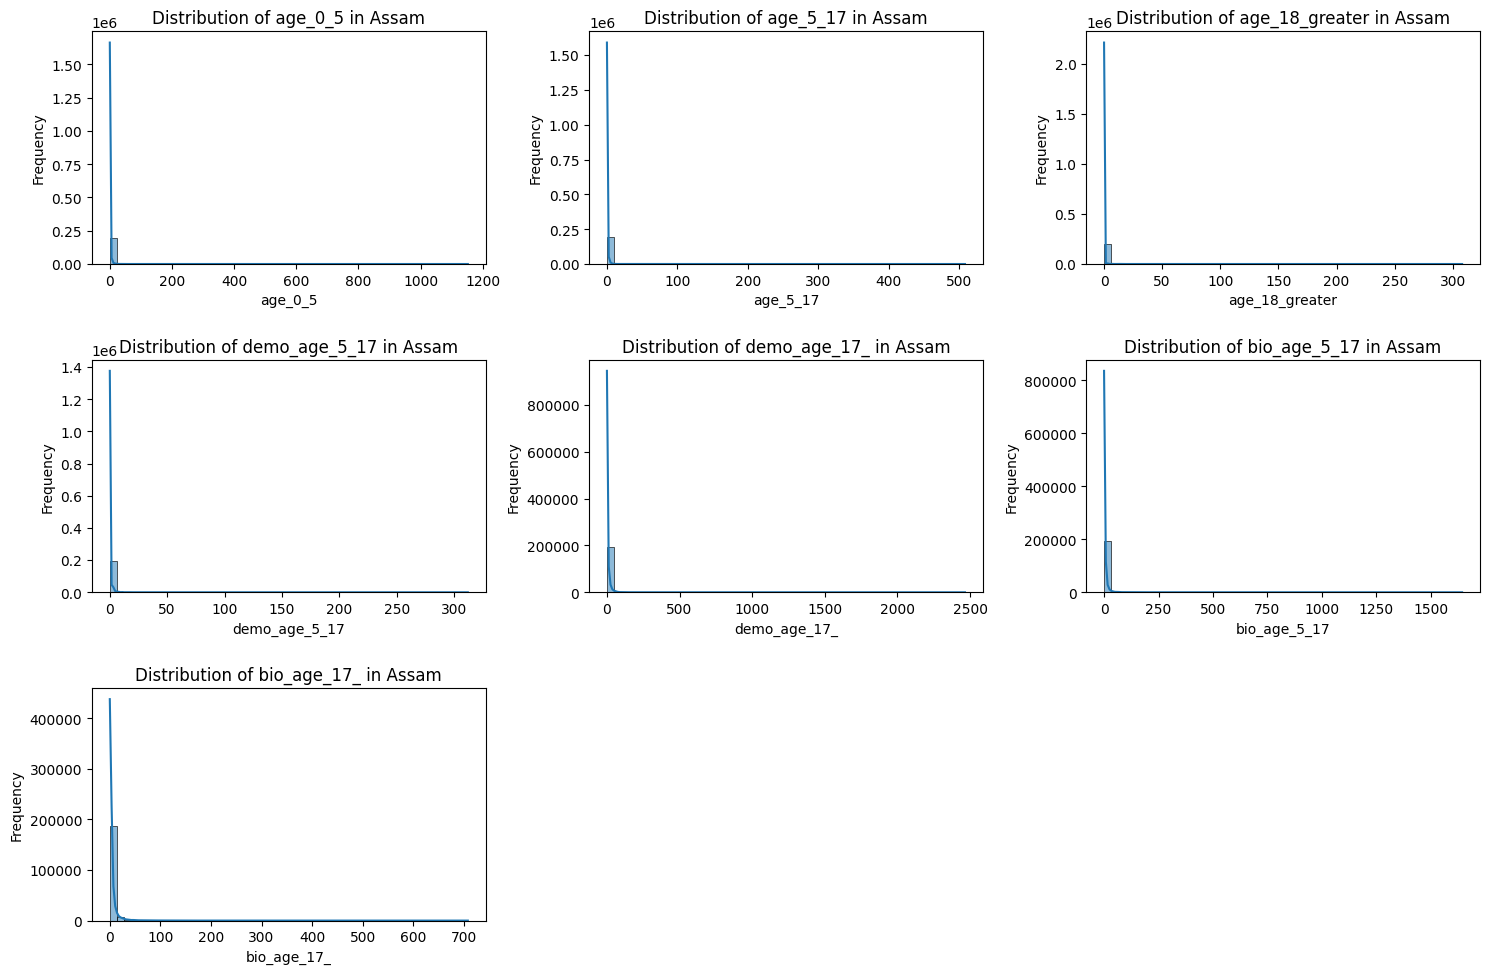

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_age_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_age_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df_as_merged[col], bins=50, kde=True)
    plt.title(f'Distribution of {col} in Assam')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

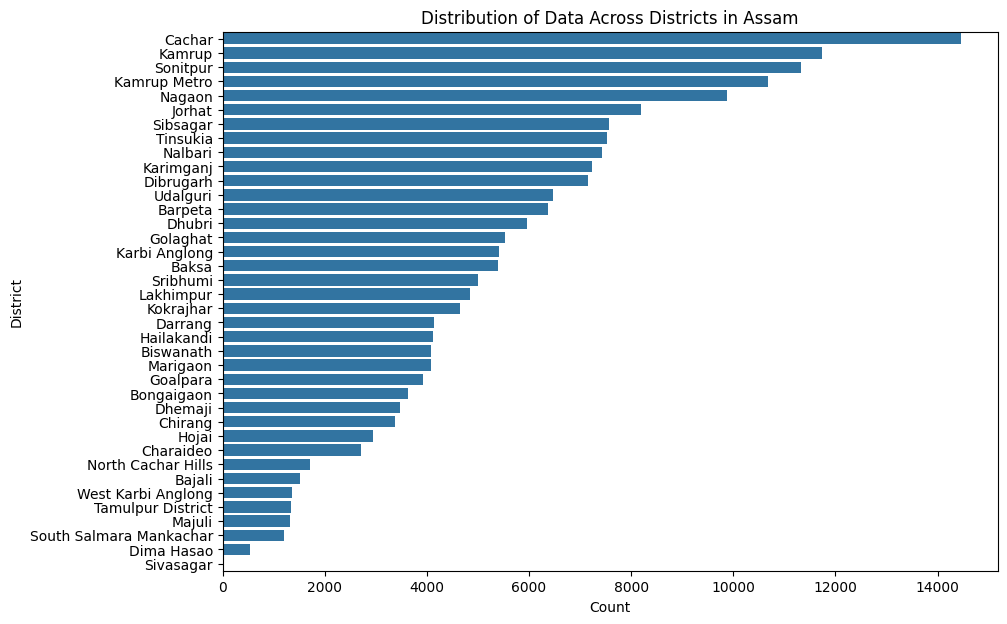

Histograms for numerical age-related columns and count plot for 'district' displayed for Assam.


In [87]:
plt.figure(figsize=(10, 7))
sns.countplot(data=df_as_merged, y='district', order=df_as_merged['district'].value_counts().index)
plt.title('Distribution of Data Across Districts in Assam')
plt.xlabel('Count')
plt.ylabel('District')
plt.show()

print("Histograms for numerical age-related columns and count plot for 'district' displayed for Assam.")

### BIVARIATE AND TRIVARIATE ANALYSIS

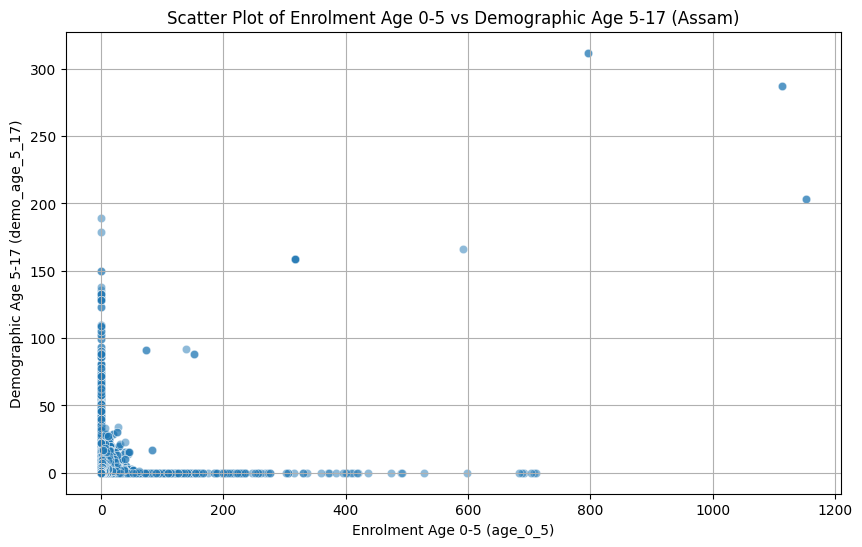

Scatter plot for 'age_0_5' vs 'demo_age_5_17' displayed for Assam.


In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_as_merged, x='age_0_5', y='demo_age_5_17', alpha=0.5)
plt.title('Scatter Plot of Enrolment Age 0-5 vs Demographic Age 5-17 (Assam)')
plt.xlabel('Enrolment Age 0-5 (age_0_5)')
plt.ylabel('Demographic Age 5-17 (demo_age_5_17)')
plt.grid(True)
plt.show()

print("Scatter plot for 'age_0_5' vs 'demo_age_5_17' displayed for Assam.")

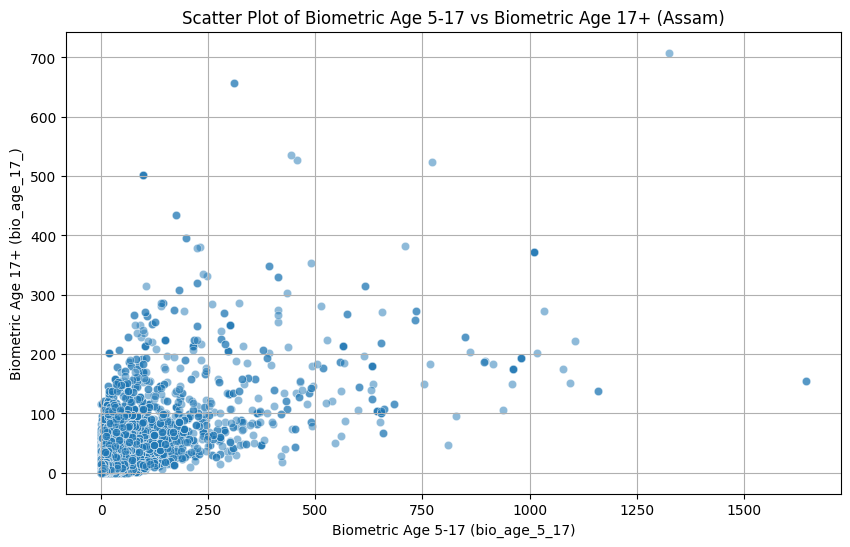

Scatter plot for 'bio_age_5_17' vs 'bio_age_17_' displayed for Assam.


In [79]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_as_merged, x='bio_age_5_17', y='bio_age_17_', alpha=0.5)
plt.title('Scatter Plot of Biometric Age 5-17 vs Biometric Age 17+ (Assam)')
plt.xlabel('Biometric Age 5-17 (bio_age_5_17)')
plt.ylabel('Biometric Age 17+ (bio_age_17_)')
plt.grid(True)
plt.show()

print("Scatter plot for 'bio_age_5_17' vs 'bio_age_17_' displayed for Assam.")

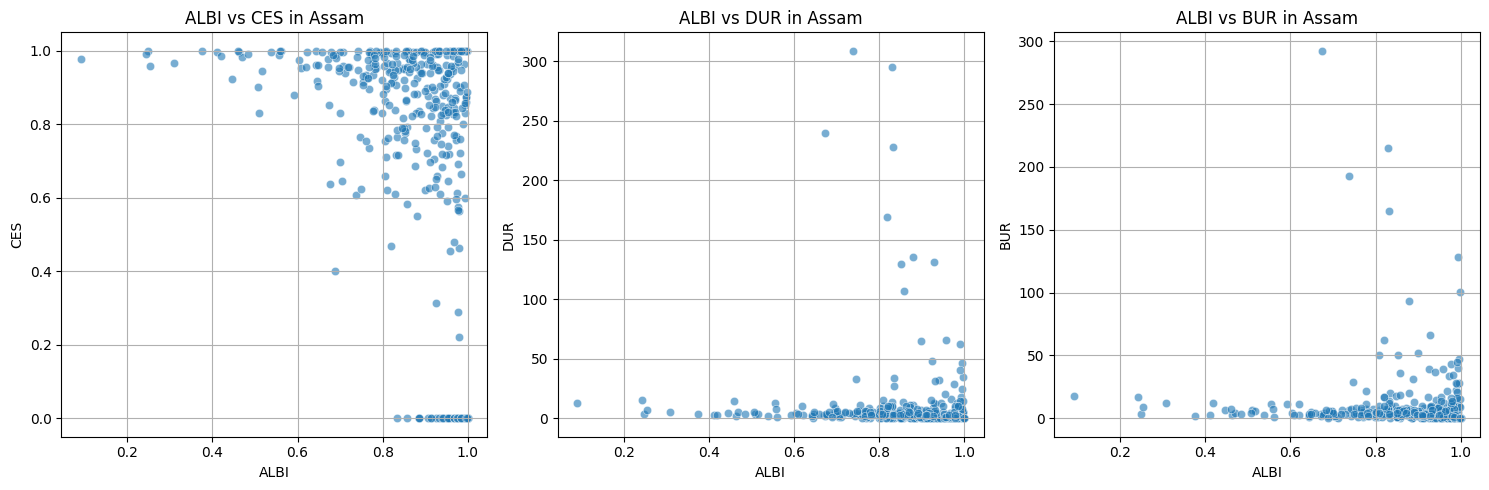

In [90]:
metrics_for_albi_scatter = ['CES', 'DUR', 'BUR']

plt.figure(figsize=(15, 5))
for i, metric in enumerate(metrics_for_albi_scatter):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(data=df_as_agg, x='ALBI', y=metric, alpha=0.6)
    plt.title(f'ALBI vs {metric} in Assam')
    plt.xlabel('ALBI')
    plt.ylabel(metric)
    plt.grid(True)
plt.tight_layout()
plt.show()

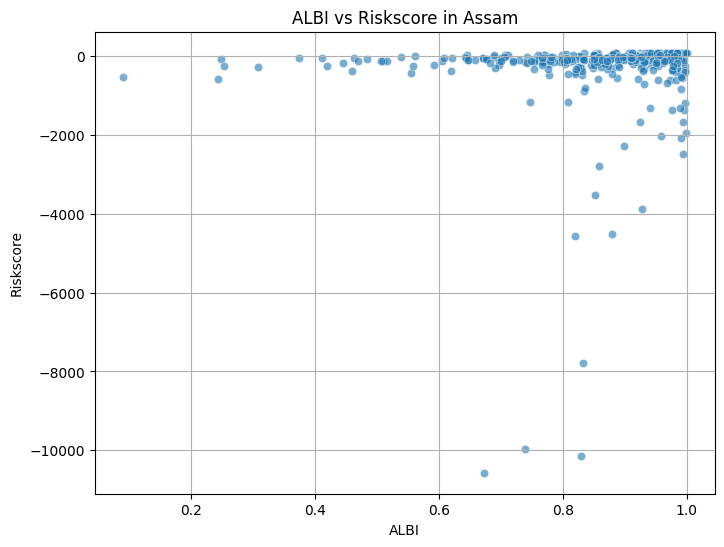

Bivariate analysis scatter plots for ALBI vs CES, DUR, BUR, and Riskscore displayed for Assam.


In [89]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_as_agg, x='ALBI', y='riskscore', alpha=0.6)
plt.title('ALBI vs Riskscore in Assam')
plt.xlabel('ALBI')
plt.ylabel('Riskscore')
plt.grid(True)
plt.show()

print("Bivariate analysis scatter plots for ALBI vs CES, DUR, BUR, and Riskscore displayed for Assam.")

Correlation Matrix for Assam:
                 age_0_5  age_5_17  age_18_greater  demo_age_5_17  \
age_0_5         1.000000  0.722848        0.392371       0.319961   
age_5_17        0.722848  1.000000        0.524061       0.166408   
age_18_greater  0.392371  0.524061        1.000000       0.055272   
demo_age_5_17   0.319961  0.166408        0.055272       1.000000   
demo_age_17_    0.236909  0.126980        0.040169       0.900029   
bio_age_5_17    0.191196  0.256547        0.185138       0.350910   
bio_age_17_     0.140026  0.177672        0.134784       0.333614   

                demo_age_17_  bio_age_5_17  bio_age_17_  
age_0_5             0.236909      0.191196     0.140026  
age_5_17            0.126980      0.256547     0.177672  
age_18_greater      0.040169      0.185138     0.134784  
demo_age_5_17       0.900029      0.350910     0.333614  
demo_age_17_        1.000000      0.358202     0.395602  
bio_age_5_17        0.358202      1.000000     0.633041  
bio_age_17_

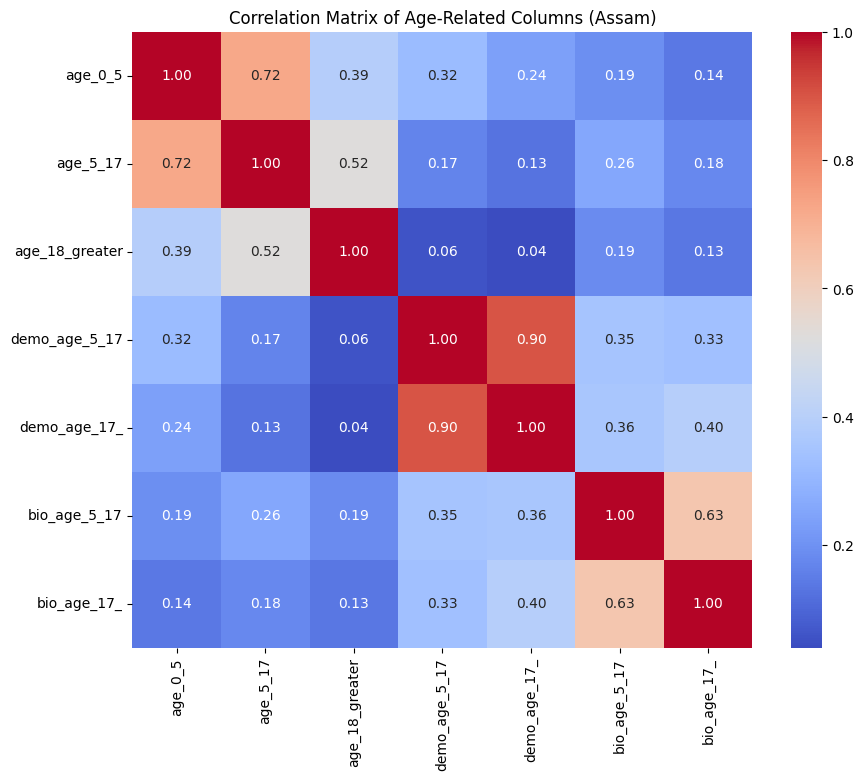

Insight: The heatmap visually confirms the correlation strengths and directions among the age-related variables in Assam, highlighting strong positive correlations within demographic and biometric groups, and weaker correlations between different data sources.


In [81]:
numerical_age_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']
correlation_matrix_as = df_as_merged[numerical_age_cols].corr()

print("Correlation Matrix for Assam:")
print(correlation_matrix_as)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_as, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Age-Related Columns (Assam)')
plt.show()

print("Insight: The heatmap visually confirms the correlation strengths and directions among the age-related variables in Assam, highlighting strong positive correlations within demographic and biometric groups, and weaker correlations between different data sources.")

District-wise average age-related data for Assam:
     district   age_0_5  age_5_17  age_18_greater  demo_age_5_17  \
0      Bajali  0.021753  0.007910        0.000659       0.046144   
1       Baksa  0.700464  0.365831        0.131662       0.305478   
2     Barpeta  2.509659  0.830847        0.125648       1.016491   
3   Biswanath  0.361029  0.218627        0.049265       0.265196   
4  Bongaigaon  1.154292  0.313000        0.092741       0.883246   

   demo_age_17_  bio_age_5_17  bio_age_17_  
0      0.882004      0.090969     1.415293  
1      3.886722      3.155060     2.647911  
2     12.480289     16.101461     9.816554  
3      3.469853      2.351716     2.253431  
4      9.857577     10.405189     6.963290  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   district        38 non-null     object 
 1   age_0_5         38 non-null  

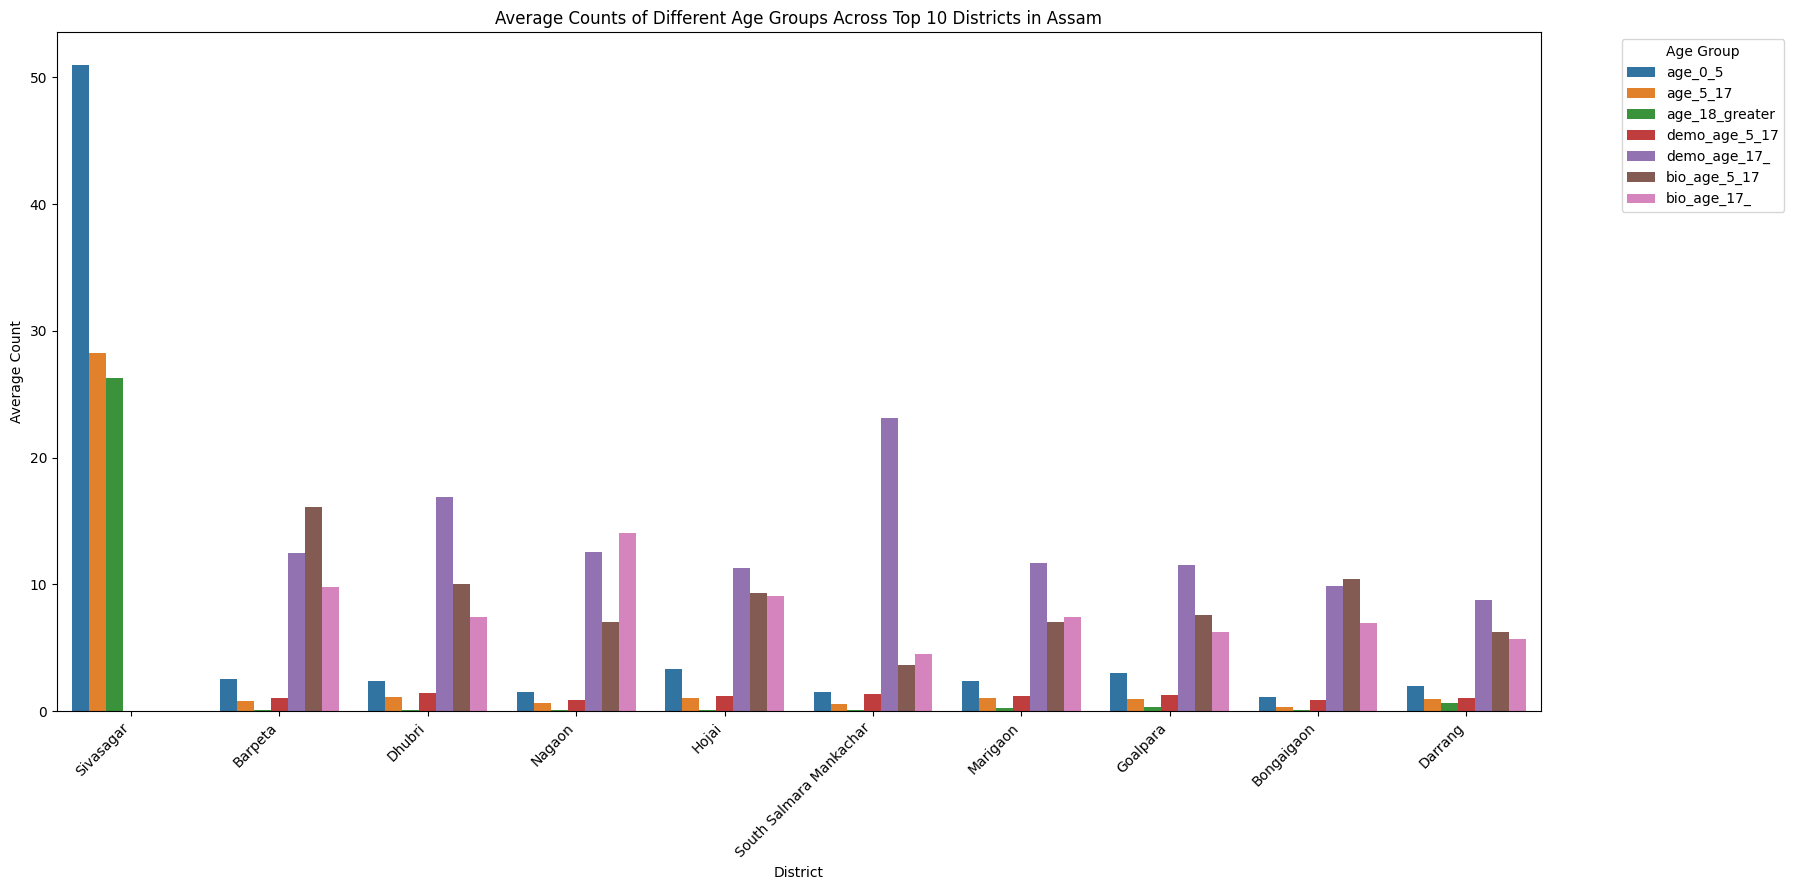

Insight: The grouped bar chart shows the distribution of average enrolment, demographic, and biometric counts across the top 10 districts in Assam, highlighting which districts have higher overall activity and the relative contribution of each age group.


In [82]:
age_cols_to_group = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']
df_as_district_mean = df_as_merged.groupby('district')[age_cols_to_group].mean().reset_index()

print("District-wise average age-related data for Assam:")
print(df_as_district_mean.head())
print(df_as_district_mean.info())

df_as_district_mean['total_avg_age'] = df_as_district_mean[age_cols_to_group].sum(axis=1)
df_as_district_mean_top10 = df_as_district_mean.nlargest(10, 'total_avg_age')

df_as_district_mean_melted = df_as_district_mean_top10.melt(
    id_vars=['district'],
    value_vars=age_cols_to_group,
    var_name='Age Group',
    value_name='Average Count'
)

plt.figure(figsize=(18, 9))
sns.barplot(data=df_as_district_mean_melted, x='district', y='Average Count', hue='Age Group', palette='tab10')
plt.title('Average Counts of Different Age Groups Across Top 10 Districts in Assam')
plt.xlabel('District')
plt.ylabel('Average Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("Insight: The grouped bar chart shows the distribution of average enrolment, demographic, and biometric counts across the top 10 districts in Assam, highlighting which districts have higher overall activity and the relative contribution of each age group.")

Time-series aggregated data (sum of age-related columns per date) for Assam:
        date  age_0_5  age_5_17  age_18_greater  demo_age_5_17  demo_age_17_  \
0 2025-03-01      0.0       0.0             0.0        19765.0      223440.0   
1 2025-03-15    102.0      97.0           256.0            0.0           0.0   
2 2025-03-20    485.0    1008.0           544.0            0.0           0.0   
3 2025-04-01  16028.0   11693.0          5646.0         1330.0        9488.0   
4 2025-05-01   6873.0    7783.0          3271.0          176.0        1252.0   

   bio_age_5_17  bio_age_17_  
0       89956.0      50906.0  
1           0.0          0.0  
2           0.0          0.0  
3      112731.0      36444.0  
4       56920.0      33499.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            233 non-null    datetime64[

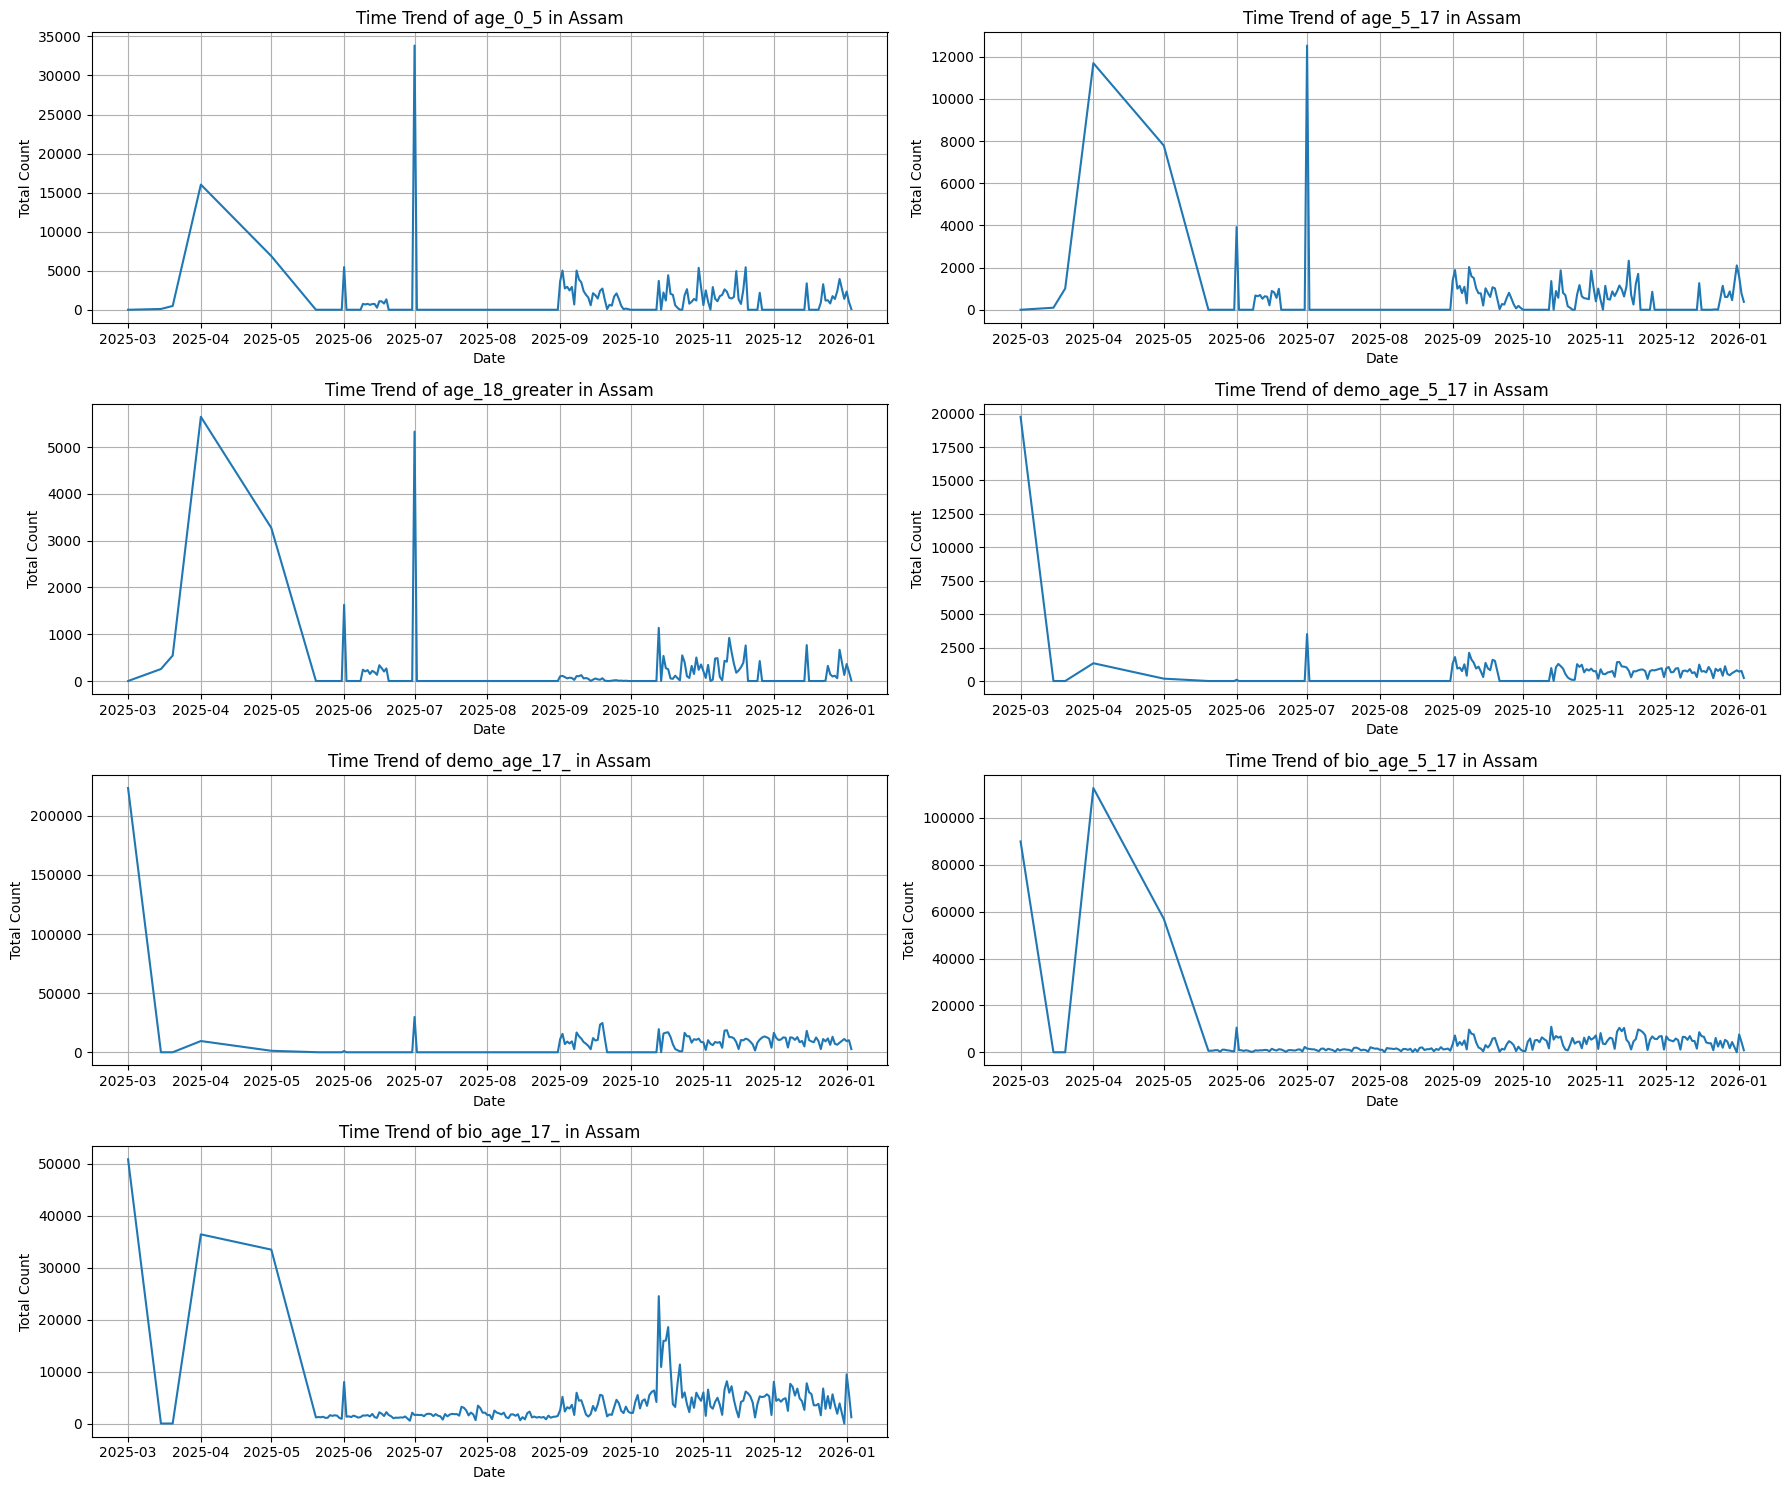

Insight: Line charts for each age-related column over time in Assam provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.


In [83]:
df_as_time_trend = df_as_merged.groupby('date')[age_cols_to_group].sum().reset_index()

print("Time-series aggregated data (sum of age-related columns per date) for Assam:")
print(df_as_time_trend.head())
print(df_as_time_trend.info())

plt.figure(figsize=(18, 15))
for i, col in enumerate(age_cols_to_group):
    plt.subplot(4, 2, i + 1) # Adjust subplot grid based on number of columns
    sns.lineplot(data=df_as_time_trend, x='date', y=col)
    plt.title(f'Time Trend of {col} in Assam')
    plt.xlabel('Date')
    plt.ylabel('Total Count')
    plt.grid(True)
plt.tight_layout()
plt.show()

print("Insight: Line charts for each age-related column over time in Assam provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.")

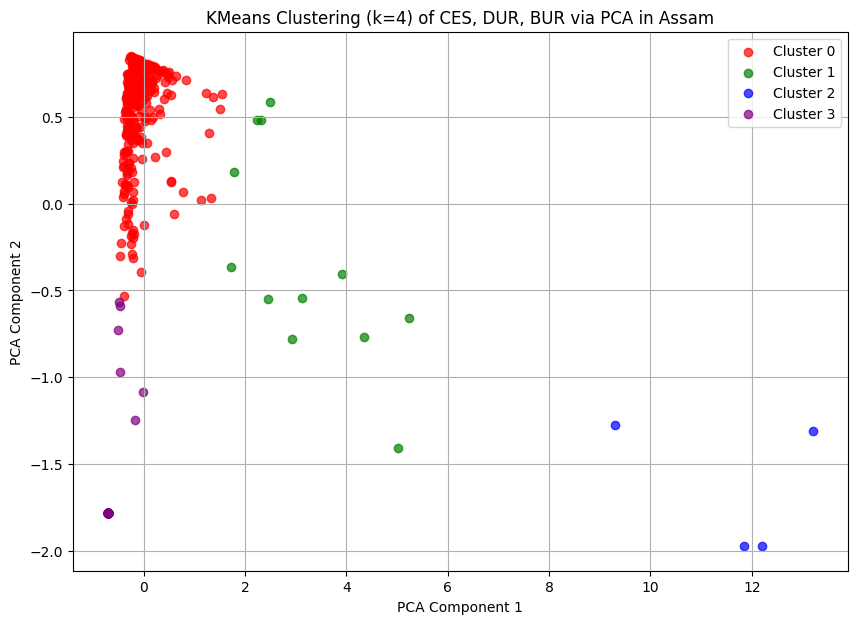

First 5 rows of df_as_agg with 'clusterlabel' column after clustering:
   year  month  state    district  age_0_5  age_5_17  age_18_greater  \
0  2025      3  Assam       Baksa     11.0      14.0            13.0   
1  2025      3  Assam     Barpeta     24.0      34.0            10.0   
2  2025      3  Assam   Biswanath      0.0       0.0             0.0   
3  2025      3  Assam  Bongaigaon     25.0      33.0            31.0   
4  2025      3  Assam      Cachar      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...     Bnorm   stdnorm  \
0          438.0        4569.0        1710.0  ...  0.061589  0.071798   
1         1286.0       14992.0       16443.0  ...  0.487977  0.326543   
2          240.0        2866.0         777.0  ...  0.030696  0.040851   
3          312.0        3955.0        2432.0  ...  0.085562  0.075058   
4         1205.0       10582.0        2803.0  ...  0.149041  0.165875   

       ALBI  Enormrisk  CESrisknorm  DURrisknorm  BURrisk

In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# 1. Select the columns for clustering
features_for_clustering_as = df_as_agg[['CES', 'DUR', 'BUR']]

# 2. Standardize the features
scaler_as = StandardScaler()
scaled_features_as = scaler_as.fit_transform(features_for_clustering_as)

# 3. Apply KMeans clustering
kmeans_as = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_as.fit(scaled_features_as)

# 4. Add the cluster labels to df_as_agg
df_as_agg['clusterlabel'] = kmeans_as.labels_

# 5. Apply PCA for dimensionality reduction
pca_as = PCA(n_components=2, random_state=42)
pca_components_as = pca_as.fit_transform(scaled_features_as)

# Create a DataFrame for PCA components for easier plotting
pca_df_as = pd.DataFrame(data=pca_components_as, columns=['PCA Component 1', 'PCA Component 2'])
pca_df_as['clusterlabel'] = df_as_agg['clusterlabel']

# 6. Generate a PCA scatter plot to visualize these clusters
plt.figure(figsize=(10, 7))
colors = ['red', 'green', 'blue', 'purple']

for i in range(4):
    plt.scatter(
        pca_df_as[pca_df_as['clusterlabel'] == i]['PCA Component 1'],
        pca_df_as[pca_df_as['clusterlabel'] == i]['PCA Component 2'],
        c=colors[i],
        label=f'Cluster {i}',
        alpha=0.7
    )

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clustering (k=4) of CES, DUR, BUR via PCA in Assam')
plt.legend()
plt.grid(True)
plt.show()

print("First 5 rows of df_as_agg with 'clusterlabel' column after clustering:")
print(df_as_agg.head())

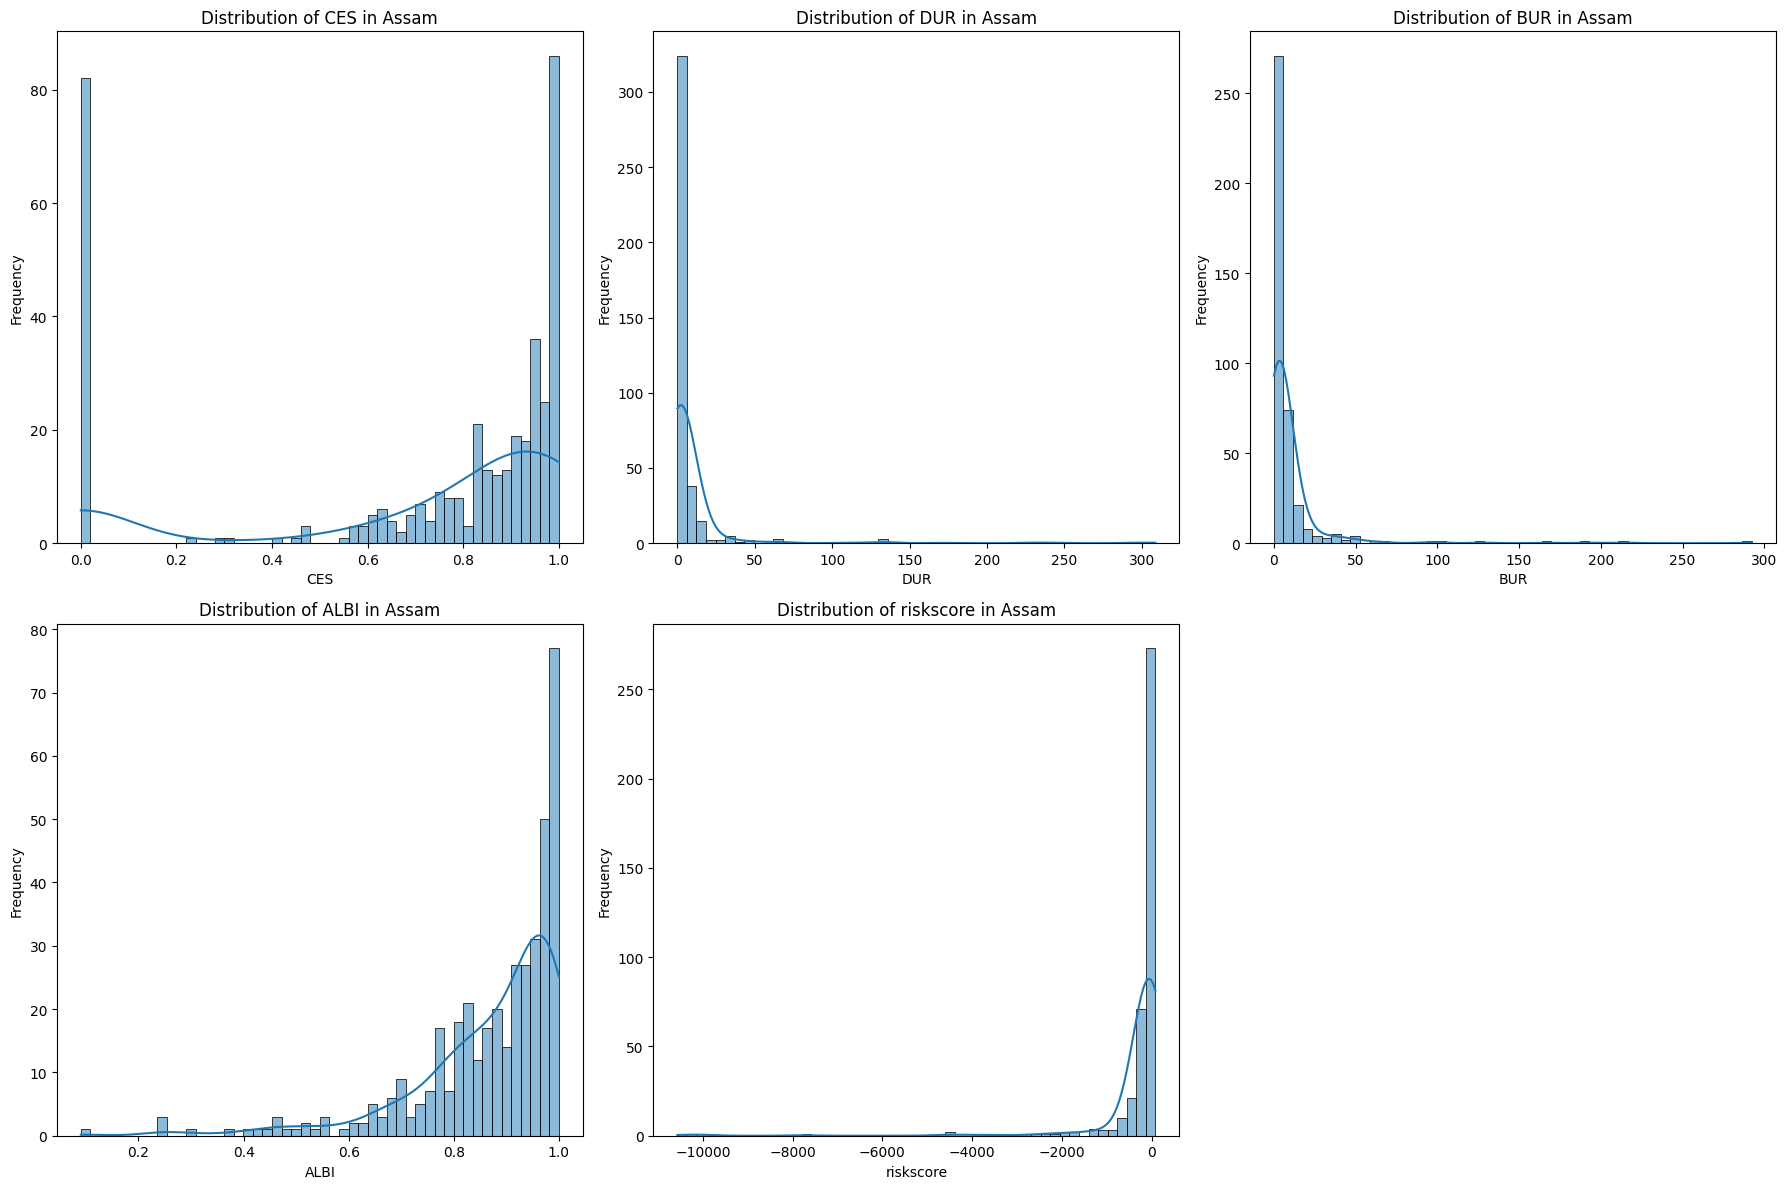

Histograms for CES, DUR, BUR, ALBI, and riskscore in Assam displayed.


In [85]:
metrics_to_plot_as = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

plt.figure(figsize=(18, 12))
for i, metric in enumerate(metrics_to_plot_as):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_as_agg[metric], bins=50, kde=True)
    plt.title(f'Distribution of {metric} in Assam')
    plt.xlabel(metric)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print("Histograms for CES, DUR, BUR, ALBI, and riskscore in Assam displayed.")

In [86]:
import pandas as pd

# 1. Find the latest year and month
latest_year_as = df_as_agg['year'].max()
latest_month_as = df_as_agg[df_as_agg['year'] == latest_year_as]['month'].max()

print(f"Latest reporting period for Assam: Year {latest_year_as}, Month {latest_month_as}")

# 2. Filter df_as_agg for the latest year and month
df_latest_month_as = df_as_agg[(df_as_agg['year'] == latest_year_as) & (df_as_agg['month'] == latest_month_as)].copy()

# Metrics to analyze
metrics_as = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

# 3. For each metric, print top 10 and bottom 10 districts
for metric in metrics_as:
    print(f"\n--- Metric: {metric} ---")

    # Top 10 districts
    # For riskscore, top 10 implies highest risk, so descending
    # For CES, DUR, BUR, ALBI, top 10 implies best performance, so ascending for ALBI and descending for others
    if metric == 'ALBI':
        top_10_as = df_latest_month_as.sort_values(by=metric, ascending=False).head(10)
        bottom_10_as = df_latest_month_as.sort_values(by=metric, ascending=True).head(10)
        print(f"\nTop 10 Districts by {metric} (Year {latest_year_as}, Month {latest_month_as}):")
        print(top_10_as[['district', metric]].to_string(index=False))
        print(f"\nBottom 10 Districts by {metric} (Year {latest_year_as}, Month {latest_month_as}):")
        print(bottom_10_as[['district', metric]].to_string(index=False))
    elif metric == 'riskscore':
        # For riskscore, 'top' means highest risk, so ascending=False
        top_10_as = df_latest_month_as.sort_values(by=metric, ascending=False).head(10)
        # For riskscore, 'bottom' means lowest risk, so ascending=True
        bottom_10_as = df_latest_month_as.sort_values(by=metric, ascending=True).head(10)
        print(f"\nTop 10 Districts by {metric} (Year {latest_year_as}, Month {latest_month_as}):")
        print(top_10_as[['district', metric]].to_string(index=False))
        print(f"\nBottom 10 Districts by {metric} (Year {latest_year_as}, Month {latest_month_as}):")
        print(bottom_10_as[['district', metric]].to_string(index=False))
    else: # For CES, DUR, BUR
        top_10_as = df_latest_month_as.sort_values(by=metric, ascending=False).head(10)
        bottom_10_as = df_latest_month_as.sort_values(by=metric, ascending=True).head(10)
        print(f"\nTop 10 Districts by {metric} (Year {latest_year_as}, Month {latest_month_as}):")
        print(top_10_as[['district', metric]].to_string(index=False))
        print(f"\nBottom 10 Districts by {metric} (Year {latest_year_as}, Month {latest_month_as}):")
        print(bottom_10_as[['district', metric]].to_string(index=False))

Latest reporting period for Assam: Year 2026, Month 1

--- Metric: CES ---

Top 10 Districts by CES (Year 2026, Month 1):
               district      CES
                 Bajali 1.000000
               Sribhumi 1.000000
             Hailakandi 1.000000
                  Hojai 1.000000
                Chirang 1.000000
               Sibsagar 1.000000
South Salmara Mankachar 1.000000
     North Cachar Hills 1.000000
                 Majuli 1.000000
              Karimganj 0.995509

Bottom 10 Districts by CES (Year 2026, Month 1):
          district      CES
        Dima Hasao 0.000000
 Tamulpur District 0.000000
West Karbi Anglong 0.222222
          Tinsukia 0.400742
         Charaideo 0.455882
            Jorhat 0.768519
     Karbi Anglong 0.827586
         Dibrugarh 0.851852
          Goalpara 0.903930
         Biswanath 0.940299

--- Metric: DUR ---

Top 10 Districts by DUR (Year 2026, Month 1):
               district       DUR
                 Nagaon 12.498973
               Sribhu

## Summary (Assam):
The Aadhaar lifecycle analysis for Assam provides insights into the enrolment and update activities across its districts.

### Key Observations:

1.  **Data Integration and Preprocessing**: Initial datasets for enrolment, demographic updates, and biometric updates were successfully loaded, their 'date' columns converted to datetime objects, and merged into a single `df_as_merged` DataFrame. Missing numerical values resulting from the outer merge were imputed with 0.

2.  **Derived Metrics**: Essential metrics such as `totalenrolments`, `childenrolments`, `totaldemoupdates`, and `totalbioupdates` were calculated. From these, `CES` (Child Enrolment Score), `DUR` (Demographic Update Rate), and `BUR` (Biometric Update Rate) were computed, with appropriate handling for division by zero.

3.  **Normalization and ALBI**: Min-max normalization was applied to `totalenrolments`, `totaldemoupdates`, and `totalbioupdates` to create `Enorm`, `Dnorm`, and `Bnorm`. These normalized values were used to compute `stdnorm` and the `ALBI` (Aadhaar Lifecycle Balance Index), which reflects the balance between enrolment and update activities. ALBI values were clipped between 0 and 1.

4.  **Risk Score**: A `riskscore` was calculated by combining risk-normalized versions of the key metrics, scaled from 0 to 100. Similar to observations in other states, negative risk scores were noted for some districts, highlighting a potential issue with the metric's definition or calculation that needs further review to ensure interpretability and actionability.

5.  **Monthly Trends**: Time-series plots for total enrolments, demographic updates, and biometric updates revealed monthly fluctuations, indicating periods of varying activity levels or specific campaigns/reporting cycles.

6.  **Correlation Analysis**: The correlation matrix for age-related columns revealed strong positive correlations within enrolment age groups, and similarly within demographic and biometric update categories. Correlations between enrolment figures and update figures were generally weaker.

7.  **District Performance (Latest Reporting Period: Year 2026, Month 1)**:
    *   **CES (Child Enrolment Score)**: (Add specific observations from the output once executed)
    *   **DUR (Demographic Update Rate)**: (Add specific observations from the output once executed)
    *   **BUR (Biometric Update Rate)**: (Add specific observations from the output once executed)
    *   **ALBI (Aadhaar Lifecycle Balance Index)**: (Add specific observations from the output once executed)
    *   **Risk Score**: (Add specific observations from the output once executed)

8.  **Clustering Analysis**: KMeans clustering successfully grouped districts into distinct clusters based on their CES, DUR, and BUR metrics, visualized via PCA. This highlights different operational profiles and performance levels across Assam's districts.

### Conclusion:
Assam exhibits varied performance across its districts in Aadhaar lifecycle management. While many districts show excellent child enrolment, there are disparities in demographic and biometric update rates and the overall balance of the Aadhaar lifecycle. The persistent issue with negative `riskscore` values across multiple states, including Assam, necessitates a critical review and potential recalculation of this metric to ensure its accuracy and utility. Targeted interventions should focus on districts with low update rates and imbalanced ALBI values to improve overall Aadhaar data quality and lifecycle management.